In [8]:
# import pandas library
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

In [9]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [10]:
stock = pd.read_csv('/content/drive/My Drive/datasets/toronto.csv')

In [11]:
stock=stock.drop('Date',axis =1)

In [12]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume
0,8961.799805,8961.799805,8611.500000,8611.500000,8611.500000,69042300
1,8582.299805,8937.799805,8487.700195,8937.799805,8937.799805,116327600
2,8948.299805,8965.400391,8893.900391,8905.700195,8905.700195,130402800
3,8838.299805,8863.099609,8690.200195,8690.200195,8690.200195,93476000
4,8681.599609,8683.400391,8577.200195,8671.700195,8671.700195,80755800


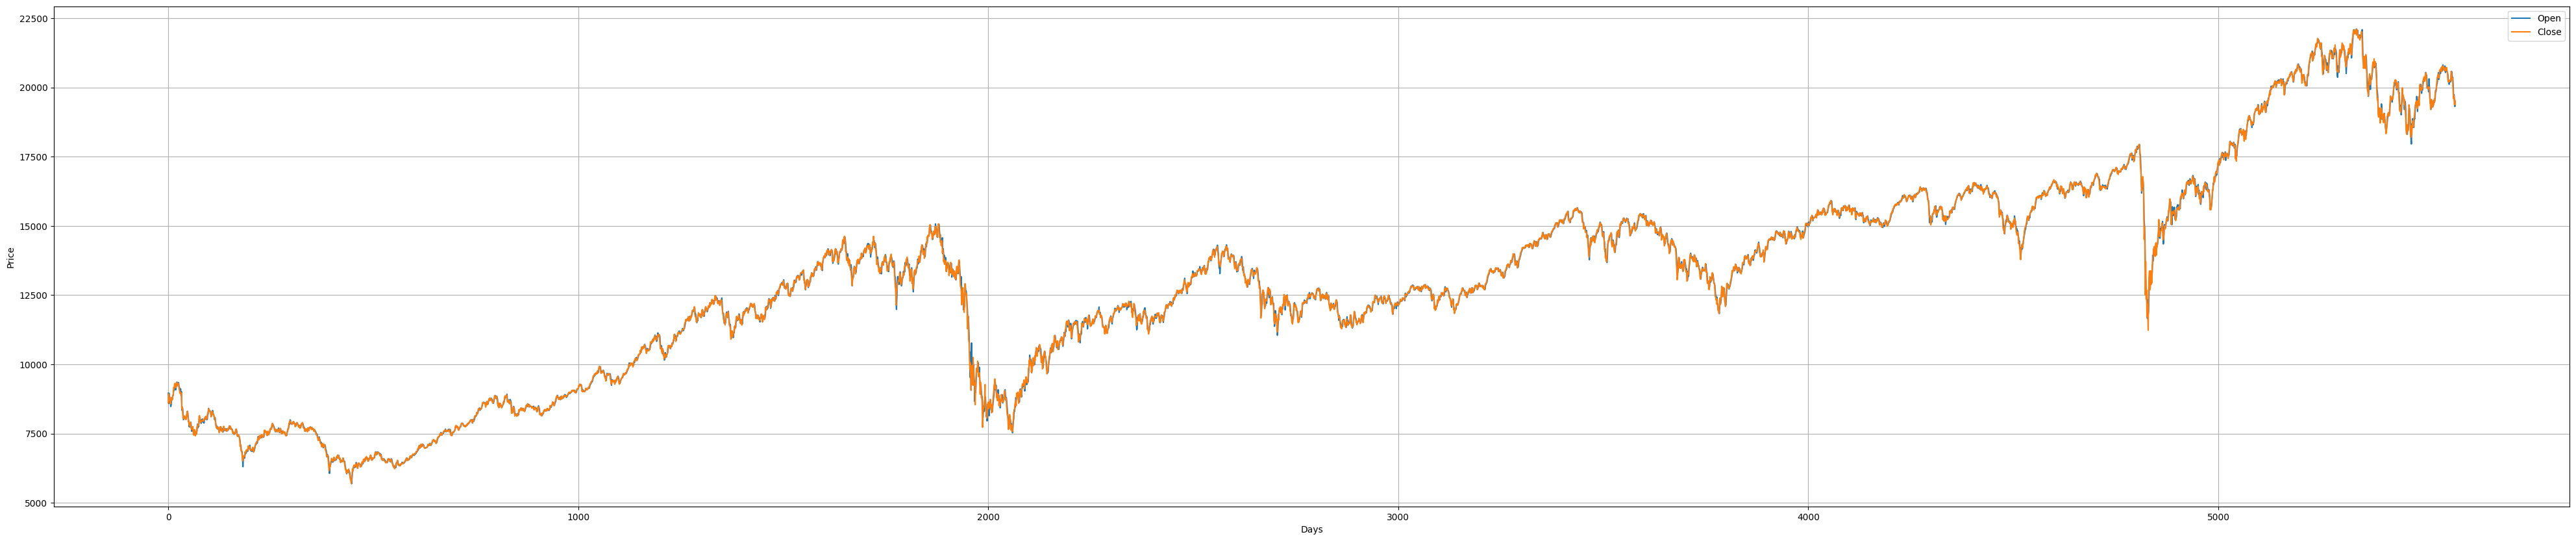

In [13]:
fig = plt.figure(figsize =(50, 10)) 
plt.plot(stock["Open"])
plt.plot(stock["Close"])
plt.legend(['Open','Close'])
plt.grid(True)
plt.xlabel("Days")
plt.ylabel("Price")
plt.rcParams["font.size"] = "16"
plt.show()
# fig.savefig("dataset.eps")

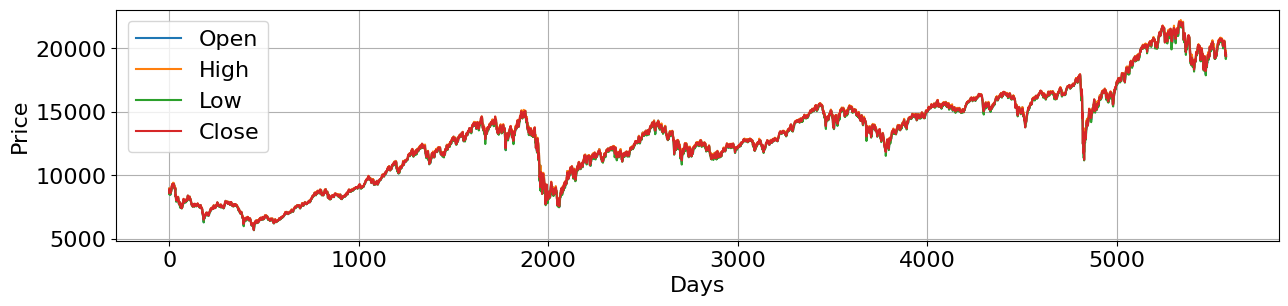

In [14]:
fig = plt.figure(figsize =(15, 3)) 
plt.plot(stock["Open"])
plt.plot(stock["High"])
plt.plot(stock["Low"])
plt.plot(stock["Close"])
plt.legend(['Open','High','Low','Close'])
plt.grid(True)
plt.xlabel("Days")
plt.ylabel("Price")
plt.rcParams["font.size"] = "16"
plt.show()
# fig.savefig("dataset.eps")

In [15]:
stock.head(10)
print("instances and Features: ",stock.shape)      #Rows and columns

instances and Features:  (5579, 6)


In [16]:
stock.info()   #Info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5579 entries, 0 to 5578
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       5579 non-null   float64
 1   High       5579 non-null   float64
 2   Low        5579 non-null   float64
 3   Close      5579 non-null   float64
 4   Adj Close  5579 non-null   float64
 5   Volume     5579 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 261.6 KB


In [17]:
stock['target']=np.nan    #First we have to assign the target column from the dataset.For that, we created a nan values column in the datset.

In [18]:
stock.target            # shows the rows of target column

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
5574   NaN
5575   NaN
5576   NaN
5577   NaN
5578   NaN
Name: target, Length: 5579, dtype: float64

In [19]:
stock.Close  #Fill that nan column with closing price column of data.As, we are interested in predicting the trend of closing price.

0        8611.500000
1        8937.799805
2        8905.700195
3        8690.200195
4        8671.700195
            ...     
5574    19588.900390
5575    19694.199220
5576    19378.800780
5577    19539.000000
5578    19387.699220
Name: Close, Length: 5579, dtype: float64

In [20]:
stock

,Open,High,Low,Close,Adj Close,Volume,target
0,8961.799805,8961.799805,8611.500000,8611.500000,8611.500000,69042300,NaN
1,8582.299805,8937.799805,8487.700195,8937.799805,8937.799805,116327600,NaN
2,8948.299805,8965.400391,8893.900391,8905.700195,8905.700195,130402800,NaN
3,8838.299805,8863.099609,8690.200195,8690.200195,8690.200195,93476000,NaN
4,8681.599609,8683.400391,8577.200195,8671.700195,8671.700195,80755800,NaN
...,...,...,...,...,...,...,...
5574,19645.500000,19714.199220,19427.500000,19588.900390,19588.900390,356349500,NaN
5575,19732.900390,19850.599610,19562.300780,19694.199220,19694.199220,297283300,NaN
5576,19533.000000,19533.000000,19179.400390,19378.800780,19378.800780,387722500,NaN
5577,19311.300780,19589.400390,19155.800780,19539.000000,19539.000000,337397200,NaN


In [21]:
import pandas as pd
print(stock.isnull().sum())

Open            0
High            0
Low             0
Close           0
Adj Close       0
Volume          0
target       5579
dtype: int64


In [22]:
for i in range(1,len(stock)):
  if(stock.Close[i]>stock.Close[i-1]):
     stock.target[i]=1
  elif(stock.Close[i]<stock.Close[i-1]):
     stock.target[i]=0  
  else:
     stock.target[i]=stock.target[i-1]
     print(stock.target[i-1],stock.target[i])
     #stock.target.append(target[-1])     #Apend trend[-1] instead of a-1 to repeat same trend either high or low to coming variable based upon previous variable trend.

<ipython-input-22-b6e5fe7c6ed7>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock.target[i]=1
<ipython-input-22-b6e5fe7c6ed7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock.target[i]=0
<ipython-input-22-b6e5fe7c6ed7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock.target[i]=stock.target[i-1]


1.0 1.0
1.0 1.0
0.0 0.0
1.0 1.0
1.0 1.0
0.0 0.0


In [23]:
import pandas as pd
print(stock.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
target       1
dtype: int64


In [24]:
stock=stock.fillna(0)

In [25]:
print(stock.isnull().sum())

Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
target       0
dtype: int64


In [26]:
stock.head

<bound method NDFrame.head of               Open          High           Low         Close     Adj Close  \
0      8961.799805   8961.799805   8611.500000   8611.500000   8611.500000   
1      8582.299805   8937.799805   8487.700195   8937.799805   8937.799805   
2      8948.299805   8965.400391   8893.900391   8905.700195   8905.700195   
3      8838.299805   8863.099609   8690.200195   8690.200195   8690.200195   
4      8681.599609   8683.400391   8577.200195   8671.700195   8671.700195   
...            ...           ...           ...           ...           ...   
5574  19645.500000  19714.199220  19427.500000  19588.900390  19588.900390   
5575  19732.900390  19850.599610  19562.300780  19694.199220  19694.199220   
5576  19533.000000  19533.000000  19179.400390  19378.800780  19378.800780   
5577  19311.300780  19589.400390  19155.800780  19539.000000  19539.000000   
5578  19493.000000  19493.000000  19298.000000  19387.699220  19387.699220   

         Volume  target  
0      

In [27]:
stock.head()

,Open,High,Low,Close,Adj Close,Volume,target
0,8961.799805,8961.799805,8611.500000,8611.500000,8611.500000,69042300,0.0
1,8582.299805,8937.799805,8487.700195,8937.799805,8937.799805,116327600,1.0
2,8948.299805,8965.400391,8893.900391,8905.700195,8905.700195,130402800,0.0
3,8838.299805,8863.099609,8690.200195,8690.200195,8690.200195,93476000,0.0
4,8681.599609,8683.400391,8577.200195,8671.700195,8671.700195,80755800,0.0


In [28]:
stock.target

0       0.0
1       1.0
2       0.0
3       0.0
4       0.0
       ... 
5574    0.0
5575    1.0
5576    0.0
5577    1.0
5578    0.0
Name: target, Length: 5579, dtype: float64

In [29]:
y=stock.target

In [30]:
y.shape

(5579,)

In [31]:
stock=stock.fillna(0)

In [32]:
stock

,Open,High,Low,Close,Adj Close,Volume,target
0,8961.799805,8961.799805,8611.500000,8611.500000,8611.500000,69042300,0.0
1,8582.299805,8937.799805,8487.700195,8937.799805,8937.799805,116327600,1.0
2,8948.299805,8965.400391,8893.900391,8905.700195,8905.700195,130402800,0.0
3,8838.299805,8863.099609,8690.200195,8690.200195,8690.200195,93476000,0.0
4,8681.599609,8683.400391,8577.200195,8671.700195,8671.700195,80755800,0.0
...,...,...,...,...,...,...,...
5574,19645.500000,19714.199220,19427.500000,19588.900390,19588.900390,356349500,0.0
5575,19732.900390,19850.599610,19562.300780,19694.199220,19694.199220,297283300,1.0
5576,19533.000000,19533.000000,19179.400390,19378.800780,19378.800780,387722500,0.0
5577,19311.300780,19589.400390,19155.800780,19539.000000,19539.000000,337397200,1.0


In [33]:
y=stock.target

In [34]:
y.head()

0    0.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: target, dtype: float64

In [35]:
 # and notice here is : shows all rows while [-1] shows last column from right side.
Drop = ['Close', 'target']  #We need to remove both columns because input x must not contain target column and added target column.
X=stock.drop(Drop,axis = 1) #We cannot remove two columns at a time using drop command
# y=stock.iloc[:,[-1]]

In [36]:
y.shape

(5579,)

In [37]:
X.head(1)

,Open,High,Low,Adj Close,Volume
0,8961.799805,8961.799805,8611.5,8611.5,69042300


Machine learning Classifiers

In [38]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [39]:
import sklearn
import pandas as pd
import numpy as np
import seaborn as sns
# from sklearn.metrics import 
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
import time
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score, precision_score, recall_score, f1_score
from sklearn import metrics
import matplotlib.pyplot as plt

In [40]:
import time
from sklearn.model_selection import train_test_split
start = time.time()
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
close = time.time()
split_time = close -start
print("split_time =",split_time)

split_time = 0.003641366958618164


In [41]:
x_train

,Open,High,Low,Adj Close,Volume
4979,16084.700200,16104.599610,15999.200200,16020.900390,188804700
650,7230.299805,7262.700195,7205.000000,7257.899902,128923200
4466,15416.799800,15482.299800,15317.099610,15317.099610,389019100
708,7640.799805,7651.200195,7586.700195,7614.399902,149548800
3297,13881.000000,13947.299800,13881.000000,13900.500000,201666100
...,...,...,...,...,...
3772,12854.599610,12854.599610,12701.700200,12726.799800,225652800
5191,20611.500000,20703.900390,20570.199220,20582.900390,228293900
5226,21137.400390,21230.900390,21126.900390,21212.400390,170551000
5390,19284.000000,19320.699220,18952.699220,19004.099610,284709200


In [42]:
y_train

4979    0.0
650     1.0
4466    0.0
708     0.0
3297    1.0
       ... 
3772    0.0
5191    0.0
5226    1.0
5390    0.0
860     1.0
Name: target, Length: 3905, dtype: float64

In [43]:
y_test

2633    1.0
1550    0.0
724     1.0
2788    1.0
468     0.0
       ... 
3787    1.0
4848    1.0
5315    0.0
3383    1.0
2271    0.0
Name: target, Length: 1674, dtype: float64

In [44]:
x_test

,Open,High,Low,Adj Close,Volume
2633,12901.400390,13085.400390,12860.700200,13063.299800,277598500
1550,13259.299800,13404.500000,12947.900390,13040.099610,249326400
724,7746.100098,7766.899902,7710.700195,7766.100098,116587700
2788,12515.200200,12574.599610,12497.900390,12553.500000,200591200
468,6386.600098,6390.399902,6293.899902,6293.899902,89562400
...,...,...,...,...,...
3787,12309.599610,12524.099610,12249.799800,12377.799800,281404400
4848,14132.799800,14509.799800,14075.799800,14388.299800,334709500
5315,21144.000000,21213.300780,20912.099610,21004.500000,353650800
3383,15040.000000,15074.700200,15006.400390,15055.900390,136557800


In [45]:
%%time
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
nb = GaussianNB()
nb.fit(x_train,y_train)
t1=time.time()
predictionsnb = nb.predict(x_test)
t2=time.time()
print('Naive Bayes performance for Test set')

Accuracy_nb =  round(accuracy_score(y_test,predictionsnb)*100)
print('Accuracy: %.2f' % Accuracy_nb)

auc_nb = round(metrics.roc_auc_score(y_test,predictionsnb)*100)
print('auc: %.2f' % auc_nb)

Precision_nb =  round(precision_score(y_test,predictionsnb)*100)
print('Precision: %.2f' % Precision_nb)

Recall_nb =  round(recall_score(y_test,predictionsnb)*100)
print('Recall: %.2f' % Recall_nb)

f1_score_nb = round(f1_score(y_test,predictionsnb)*100)
print('F1-score: %.2f' % f1_score_nb)

ExecutionTime_nb =str(round((t2-t1)/len(y_test)*1000000,5))
print("Execution Time: ", ExecutionTime_nb)

mcc_nb = round(matthews_corrcoef(y_test, predictionsnb)*100)
print('mcc: %.2f' % mcc_nb)

from sklearn.metrics import cohen_kappa_score
#calculate Cohen's Kappa
kappa_nb = round(cohen_kappa_score(y_test, predictionsnb)*100)
print('kappa: %.2f' %kappa_nb)

# roc curve for models
fpr3, tpr3, thresh1 = roc_curve(y_test, predictionsnb, pos_label=1)

# auc scores
auc_nb3 = roc_auc_score(y_test, predictionsnb)


Naive Bayes performance for Test set
Accuracy: 53.00
auc: 51.00
Precision: 55.00
Recall: 77.00
F1-score: 64.00
Execution Time:  2.70137
mcc: 1.00
kappa: 1.00
CPU times: user 32.4 ms, sys: 0 ns, total: 32.4 ms
Wall time: 50.8 ms


In [46]:
%%time
from sklearn.tree import ExtraTreeClassifier

ext = ExtraTreeClassifier()
ext.fit(x_train,y_train)
t1=time.time()
predictions = ext.predict(x_test)
t2=time.time()


print('Extra Tree performance for Test set')

Accuracy_ext = round(accuracy_score(y_test,predictions)*100)
print('Accuracy: %.2f' % Accuracy_ext)

auc_ext = round(metrics.roc_auc_score(y_test,predictions)*100)
print('auc: %.2f' % auc_ext)

Precision_ext = round(precision_score(y_test,predictions)*100)
print('precision: %.2f' % Precision_ext)

Recall_ext = round(recall_score(y_test,predictions)*100)
print('Recall: %.2f' % Recall_ext)

f1_score_ext = round(f1_score(y_test,predictions)*100)
print('F1-score: %.2f' % f1_score_ext)

ExecutionTime_ext =str(round((t2-t1)/len(y_test)*1000000,5))
print("Execution Time: ", ExecutionTime_ext)

mcc_ext = round(matthews_corrcoef(y_test, predictions)*100)
print('mcc: %.2f' % mcc_ext)

from sklearn.metrics import cohen_kappa_score
#calculate Cohen's Kappa
kappa_ext = round(cohen_kappa_score(y_test, predictions)*100)
print('kappa: %.2f' %kappa_ext)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, predictions, pos_label=1)

# auc scores
auc_ext1 = roc_auc_score(y_test, predictions)

Extra Tree performance for Test set
Accuracy: 65.00
auc: 65.00
precision: 69.00
Recall: 67.00
F1-score: 68.00
Execution Time:  0.94157
mcc: 31.00
kappa: 31.00
CPU times: user 82.5 ms, sys: 20.4 ms, total: 103 ms
Wall time: 238 ms


In [47]:
%%time
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
qda = QuadraticDiscriminantAnalysis()
qda.fit(x_train,y_train)
t1=time.time()
predictionsd = qda.predict(x_test)
t2=time.time()

auc = round(metrics.roc_auc_score(y_test, predictionsd), 4)
print('QDA performance for Test set')

Accuracy_qda = round(accuracy_score(y_test,predictionsd)*100)
print('Accuracy: %.2f' % Accuracy_qda)


auc_qda = round(metrics.roc_auc_score(y_test,predictionsd)*100)
print('auc: %.2f' % auc_qda)

Precision_qda = round(precision_score(y_test,predictionsd)*100)
print('Precision: %.2f' % Precision_qda)

Recall_qda = round(recall_score(y_test,predictionsd)*100)
print('Recall: %.2f' % Recall_qda)

f1_score_qda = round(f1_score(y_test,predictionsd)*100)
print('f1-score: %.2f' % f1_score_qda)


ExecutionTime_qda =str(round((t2-t1)/len(y_test)*1000000,5))
print("Execution Time: ", ExecutionTime_qda)

mcc_qda = round(matthews_corrcoef(y_test, predictionsd)*100)
print('mcc: %.2f' % mcc_qda)

from sklearn.metrics import cohen_kappa_score
#calculate Cohen's Kappa
kappa_qda = round(cohen_kappa_score(y_test, predictionsd)*100)
print('kappa: %.2f' %kappa_qda)


# roc curve for models
fpr2, tpr2, thresh1 = roc_curve(y_test, predictionsd, pos_label=1)

# auc scores
auc_qda2 = roc_auc_score(y_test, predictionsd)

QDA performance for Test set
Accuracy: 82.00
auc: 81.00
Precision: 79.00
Recall: 93.00
f1-score: 85.00
Execution Time:  1.38152
mcc: 65.00
kappa: 64.00
CPU times: user 34.1 ms, sys: 5.22 ms, total: 39.3 ms
Wall time: 64.6 ms


In [48]:
%%time
from xgboost import XGBClassifier 
xgb = XGBClassifier()
xgb.fit(x_train,y_train)
t1=time.time()
predxgb = xgb.predict(x_test)
t2=time.time()
print('XGB performance for Test set')

Accuracy_xgb = round(accuracy_score(y_test,predxgb)*100)
print('Accuracy: %.2f' % Accuracy_xgb)

auc_xgb= round(metrics.roc_auc_score(y_test,predxgb)*100)
print('auc: %.2f' % auc_xgb)

Precision_xgb =  round(precision_score(y_test,predxgb)*100)
print('Precision: %.2f' % Precision_xgb)

Recall_xgb = round(recall_score(y_test,predxgb)*100)
print('Recall: %.2f' % Recall_xgb)

F1_score_xgb = round(f1_score(y_test,predxgb)*100)
print('F1-score: %.2f' % F1_score_xgb)


ExecutionTime_xgb =str(round((t2-t1)/len(y_test)*1000000,5))
print("Execution Time: ", ExecutionTime_xgb)

mcc_xgb = round(matthews_corrcoef(y_test, predxgb)*100)
print('mcc: %.2f' % mcc_xgb)

from sklearn.metrics import cohen_kappa_score
#calculate Cohen's Kappa
kappa_xgb = round(cohen_kappa_score(y_test, predxgb)*100)
print('kappa: %.2f' %kappa_xgb)


# roc curve for models
fpr2, tpr2, thresh1 = roc_curve(y_test, predxgb, pos_label=1)

# auc scores
auc_xgb2 = roc_auc_score(y_test, predxgb)

XGB performance for Test set
Accuracy: 75.00
auc: 75.00
Precision: 77.00
Recall: 79.00
F1-score: 78.00
Execution Time:  3.21566
mcc: 50.00
kappa: 50.00
CPU times: user 1.04 s, sys: 51.9 ms, total: 1.09 s
Wall time: 1.02 s


In [49]:
%%time
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier()
ada.fit(x_train,y_train)
t1=time.time()
y_pred_5 = ada.predict(x_test) #predict the results of test samples
t2=time.time()
from sklearn.metrics import accuracy_score
print("Accuracy", accuracy_score(y_test, y_pred_5)*100)
roc_ada = round(metrics.roc_auc_score(y_test,y_pred_5)*100)
print('Roc: %.2f' % roc_ada)
Precision_ada = round(precision_score(y_test,y_pred_5)*100)
print('precision: %.2f' % Precision_ada)
Recall_ada = round(recall_score(y_test,y_pred_5)*100)
print('Recall: %.2f' % Recall_ada)
f1_score_ada = round(f1_score(y_test,y_pred_5)*100)
print('F1-score: %.2f' % f1_score_ada)

ExecutionTime_ada =str(round((t2-t1)/len(y_test)*1000000,5))
print("Execution Time: ", ExecutionTime_ada)
mcc_ada = round(matthews_corrcoef(y_test, y_pred_5)*100)
print('mcc: %.2f' % mcc_ada)

from sklearn.metrics import cohen_kappa_score
#calculate Cohen's Kappa
kappa_ada = round(cohen_kappa_score(y_test, y_pred_5)*100)
print('kappa: %.2f' %kappa_ada)

Accuracy 56.86977299880526
Roc: 54.00
precision: 57.00
Recall: 87.00
F1-score: 69.00
Execution Time:  8.27857
mcc: 10.00
kappa: 8.00
CPU times: user 285 ms, sys: 9.25 ms, total: 295 ms
Wall time: 344 ms


In [50]:
%%time
# from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import roc_auc_score
from sklearn.ensemble import StackingClassifier
estimator_list = [
    ('nb',nb),
    ('xgb',xgb),
    ('qda',qda),
    ('ext',ext)]
# Build stack model
stack_modelf = StackingClassifier(
    estimators=estimator_list, final_estimator=AdaBoostClassifier())
stack_modelf.fit(x_train,y_train)
t1=time.time()
predictionsp = stack_modelf.predict(x_test)
t2=time.time()
print('Stacking Model performance for Test set')

Accuracy_stack_modelf = round(accuracy_score(y_test,predictionsp)*100)
print('Accuracy: %.2f' % Accuracy_stack_modelf)

#auc_stack_modelf = round(metrics.roc_auc_score(y_test,predictionsp)*100)
#print('auc: %.2f' % auc_stack_modelf)

Precision_stack_modelf = round(precision_score(y_test,predictionsp)*100)
print('Precision: %.2f' % Precision_stack_modelf)

Recall_stack_modelf = round(recall_score(y_test,predictionsp)*100)
print('Recall: %.2f' % Recall_stack_modelf)

f1_score_stack_modelf = round(f1_score(y_test,predictionsp)*100)
print('F1-score: %.2f' % f1_score_stack_modelf)

ExecutionTime_stack_modelf =str(round((t2-t1)/len(y_test)*1000000,5))
print("Execution Time: ", ExecutionTime_stack_modelf)

mcc_stack_modelf= round(matthews_corrcoef(y_test, predictionsp)*100)
print('mcc: %.2f' % mcc_stack_modelf)

from sklearn.metrics import cohen_kappa_score
#calculate Cohen's Kappa
kappa_stack_modelf = round(cohen_kappa_score(y_test, predictionsp)*100)
print('kappa: %.2f' %kappa_stack_modelf)

# roc curve for models
# fpr5, tpr5, thresh1 = roc_curve(y_test, predictionsp, pos_label=1)

# auc scores
auc_stack_model5 = round(roc_auc_score(y_test, predictionsp)*100)
print('auc: %.2f' %auc_stack_model5)


Stacking Model performance for Test set
Accuracy: 85.00
Precision: 86.00
Recall: 86.00
F1-score: 86.00
Execution Time:  13.69853
mcc: 69.00
kappa: 69.00
auc: 84.00
CPU times: user 3.96 s, sys: 39.2 ms, total: 4 s
Wall time: 2.23 s


Specificity

In [51]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictionsd).ravel()
specificity0 = tn / (tn+fp)
print("specificity_qda",specificity0)

tn, fp, fn, tp = confusion_matrix(y_test, predxgb).ravel()
specificity1 = tn / (tn+fp)
print("specificity_xgb",specificity1)

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
specificity2 = tn / (tn+fp)
print("specificity_ext",specificity2)

tn, fp, fn, tp = confusion_matrix(y_test, predictionsnb).ravel()
specificity3 = tn / (tn+fp)
print("specificity_ext",specificity3)

tn, fp, fn, tp = confusion_matrix(y_test, predictionsp).ravel()
specificityf = tn / (tn+fp)
print("specificity_stack_model",specificityf)

specificity_qda 0.6908850726552179
specificity_xgb 0.7080581241743725
specificity_ext 0.6393659180977543
specificity_ext 0.2404227212681638
specificity_stack_model 0.8282694848084544


Sensitivity

In [52]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictionsd).ravel()
sensitivity0 = tp / (tp+fn)
print("sensitivity_qda",sensitivity0)

tn, fp, fn, tp = confusion_matrix(y_test, predxgb).ravel()
sensitivity1 = tp / (tp+fn)
print("sensitivity_xgb",sensitivity1)

tn, fp, fn, tp = confusion_matrix(y_test, predictions).ravel()
sensitivity2 = tp / (tp+fn)
print("sensitivity_ext",sensitivity2)

tn, fp, fn, tp = confusion_matrix(y_test, predictionsnb).ravel()
sensitivity3 = tp / (tp+fn)
print("sensitivity_nb",sensitivity3)

tn, fp, fn, tp = confusion_matrix(y_test, predictionsp).ravel()
sensitivityf = tp / (tp+fn)
print("sensitivity_stack_model",sensitivityf)

sensitivity_qda 0.9323882224645583
sensitivity_xgb 0.7895310796074155
sensitivity_ext 0.6673936750272628
sensitivity_nb 0.7699018538713195
sensitivity_stack_model 0.8604143947655398


In [53]:
from sklearn.metrics import roc_auc_score
roc_auc = roc_auc_score(y_test, predictionsd)
print("ROC AUC score of qda:", roc_auc)
roc_auc1 = roc_auc_score(y_test, predictions)
print("ROC AUC score of ext:", roc_auc1)
roc_auc2 = roc_auc_score(y_test, predxgb)
print("ROC AUC score of xgb:", roc_auc2)
roc_auc3 = roc_auc_score(y_test, predictionsnb)
print("ROC AUC score of gnb:", roc_auc3)
roc_auc4 = roc_auc_score(y_test, predictionsp)
print("ROC AUC score of stack model:", roc_auc4)

ROC AUC score of qda: 0.8116366475598882
ROC AUC score of ext: 0.6533797965625084
ROC AUC score of xgb: 0.7487946018908941
ROC AUC score of gnb: 0.5051622875697417
ROC AUC score of stack model: 0.8443419397869971


In [54]:
from sklearn.metrics import hamming_loss
hamming_loss0 = hamming_loss(y_test, predictions)
print('hamming_loss of ext',hamming_loss0 )  # Output: 0.25
hamming_loss1 = hamming_loss(y_test, predictionsd)
print('hamming_loss of qda',hamming_loss1 )
hamming_loss2 = hamming_loss(y_test, predxgb)
print('hamming_loss of xgb',hamming_loss2 )
hamming_loss3 = hamming_loss(y_test, predictionsnb)
print('hamming_loss of gnb',hamming_loss3)
hamming_loss4 = hamming_loss(y_test, predictionsp)
print('hamming_loss of stack',hamming_loss4 )

hamming_loss of ext 0.34528076463560337
hamming_loss of qda 0.1768219832735962
hamming_loss of xgb 0.24731182795698925
hamming_loss of gnb 0.46953405017921146
hamming_loss of stack 0.15412186379928317


In [55]:
import numpy as np
from sklearn.metrics import jaccard_score
jaccard1 = jaccard_score(y_test, predictions)
print("jaccard_score of ext", jaccard1)
jaccard2 = jaccard_score(y_test, predictionsd)
print("jaccard_score of qda", jaccard2)
jaccard3 = jaccard_score(y_test, predxgb)
print("jaccard_score of xgb", jaccard3)
jaccard4 = jaccard_score(y_test, predictionsnb)
print("jaccard_score of gnb", jaccard4)
jaccard = jaccard_score(y_test, predictionsp)
print("jaccard_score of stack", jaccard)

jaccard_score of ext 0.5142857142857142
jaccard_score of qda 0.7428323197219809
jaccard_score of xgb 0.6362038664323374
jaccard_score of gnb 0.47319034852546915
jaccard_score of stack 0.7535816618911175


In [56]:
import numpy as np
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictionsd).ravel()
# calculate the true positive rate (TPR)
tpr = tp / (tp + fn)

# calculate the false positive rate (FPR)
fpr = fp / (fp + tn)

print("TPR of qda:", tpr)
print("FPR of qda:", fpr)


TPR of qda: 0.9323882224645583
FPR of qda: 0.309114927344782


In [57]:
import numpy as np
from sklearn.metrics import confusion_matrix

# calculate the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, predictionsp).ravel()
# calculate the true positive rate (TPR)
tpr = tp / (tp + fn)

# calculate the false positive rate (FPR)
fpr = fp / (fp + tn)

print("TPR of stack:", tpr)
print("FPR of stack:", fpr)


TPR of stack: 0.8604143947655398
FPR of stack: 0.17173051519154559


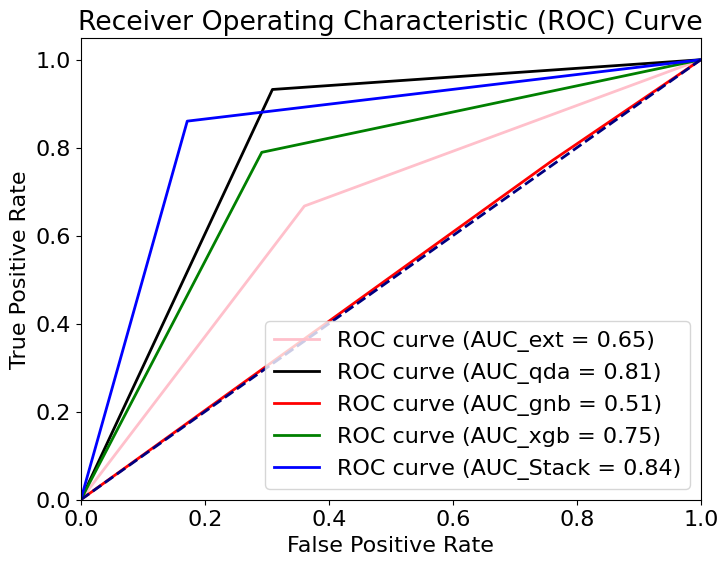

In [58]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Compute ROC curve and AUC score
fpr1, tpr1, _ = roc_curve(y_test, predictions)
roc_auc1 = auc(fpr1, tpr1)
fpr2, tpr2, _ = roc_curve(y_test, predictionsd)
roc_auc2 = auc(fpr2, tpr2)
fpr3, tpr3, _ = roc_curve(y_test, predictionsnb)
roc_auc3 = auc(fpr3, tpr3)
fpr4, tpr4, _ = roc_curve(y_test, predxgb)
roc_auc4 = auc(fpr4, tpr4)
fpr, tpr, _ = roc_curve(y_test, predictionsp)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
lw = 2
plt.plot(fpr1, tpr1, color='pink',
         lw=lw, label='ROC curve (AUC_ext = %0.2f)' % roc_auc1)
plt.plot(fpr2, tpr2, color='black',
         lw=lw, label='ROC curve (AUC_qda = %0.2f)' % roc_auc2)
plt.plot(fpr3, tpr3, color='red',
         lw=lw, label='ROC curve (AUC_gnb = %0.2f)' % roc_auc3)
plt.plot(fpr4, tpr4, color='green',
         lw=lw, label='ROC curve (AUC_xgb = %0.2f)' % roc_auc4)
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='ROC curve (AUC_Stack = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


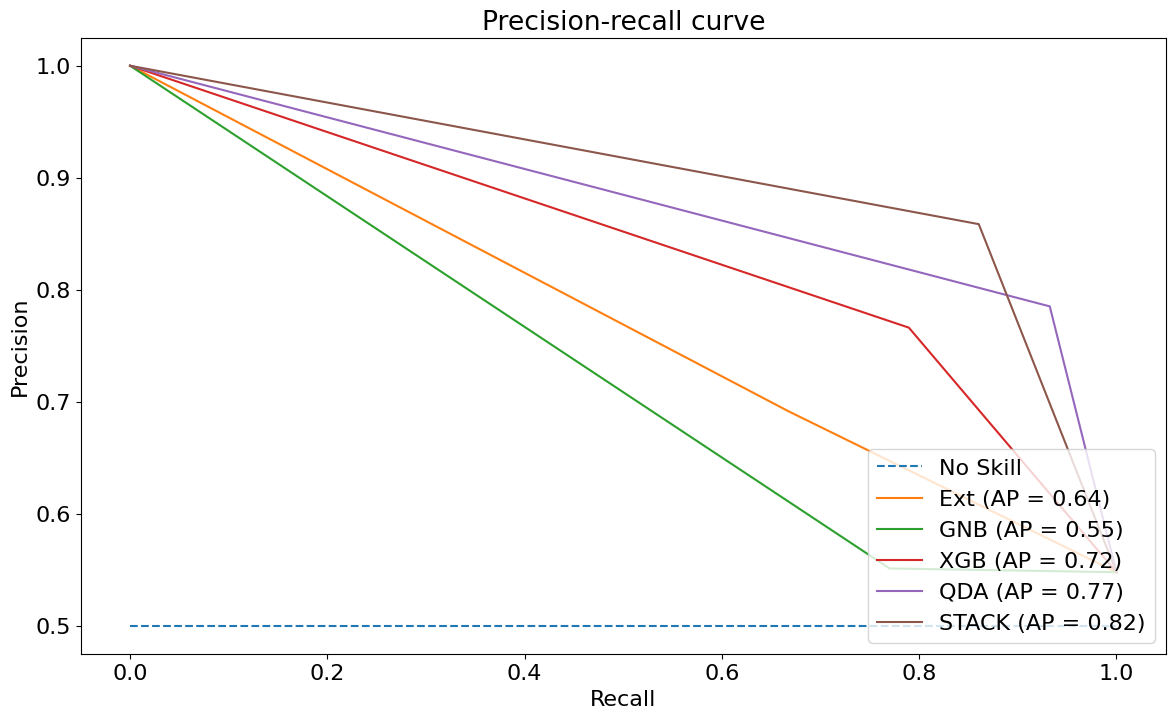

In [59]:
from sklearn.metrics import precision_recall_curve, average_precision_score
from sklearn.metrics import auc, precision_recall_curve
import matplotlib.pyplot as plt

ext_precision, ext_recall, _ = precision_recall_curve(y_test, predictions)
gnb_precision, gnb_recall, _ = precision_recall_curve(y_test, predictionsnb)
xgb_precision, xgb_recall, _ = precision_recall_curve(y_test, predxgb)
qda_precision, qda_recall, _ = precision_recall_curve(y_test, predictionsd)
adaboost_precision, adaboost_recall, _ = precision_recall_curve(y_test, predictionsp)

ext_avg_precision = average_precision_score(y_test, predictions)
gnb_avg_precision = average_precision_score(y_test, predictionsnb)
xgb_avg_precision = average_precision_score(y_test, predxgb)
qda_avg_precision = average_precision_score(y_test, predictionsd)
adaboost_avg_precision = average_precision_score(y_test, predictionsp)
plt.figure(figsize=(14, 8))


plt.plot([0, 1], [0.5, 0.5], linestyle='--', label='No Skill')
plt.plot(ext_recall, ext_precision, label=f'Ext (AP = {ext_avg_precision:.2f})')
plt.plot(gnb_recall, gnb_precision, label=f'GNB (AP = {gnb_avg_precision:.2f})')
plt.plot(xgb_recall, xgb_precision, label=f'XGB (AP = {xgb_avg_precision:.2f})')
plt.plot(qda_recall, qda_precision, label=f'QDA (AP = {qda_avg_precision:.2f})')
plt.plot(adaboost_recall, adaboost_precision, label=f'STACK (AP = {adaboost_avg_precision:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-recall curve')
plt.legend(loc="lower right")

plt.show()


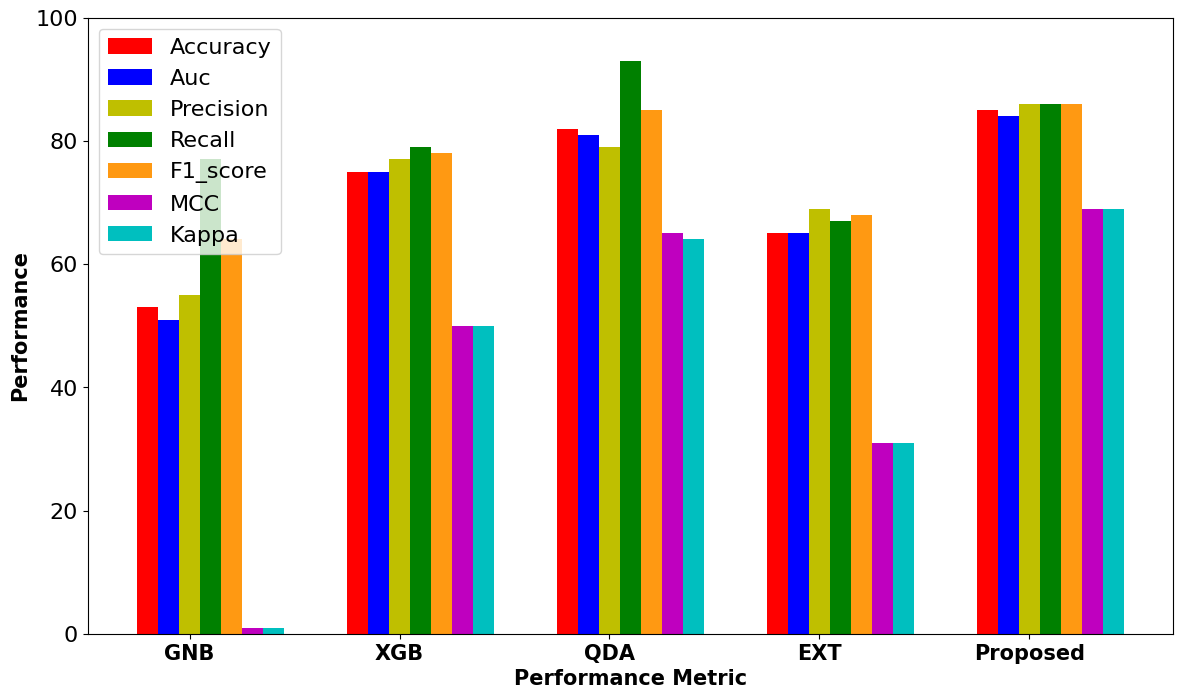

In [60]:
import matplotlib.pyplot as plt
from google.colab import files

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
# set width of bar
barWidth = 0.10
fig = plt.subplots(figsize =(14, 8))
allmod=fig
# set height of bar
y = [Accuracy_nb, Accuracy_xgb, Accuracy_qda,Accuracy_ext,Accuracy_stack_modelf]
y1 = [auc_nb, auc_xgb ,auc_qda,auc_ext,auc_stack_model5]
y2 = [Precision_nb, Precision_xgb,Precision_qda,Precision_ext,Precision_stack_modelf]
y3 = [Recall_nb,Recall_xgb, Recall_qda,Recall_ext,Recall_stack_modelf]
y4 = [f1_score_nb, F1_score_xgb,f1_score_qda,f1_score_ext,f1_score_stack_modelf]
y5 = [mcc_nb, mcc_xgb,mcc_qda,mcc_ext,mcc_stack_modelf]
y6 = [kappa_nb, kappa_xgb, kappa_qda, kappa_ext, kappa_stack_modelf]


# Set position of bar on X axis
br1 = np.arange(len(y))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]

# Make the plot
plt.bar(br1, y, color ='r', width = barWidth,  label ='Accuracy')
plt.bar(br2, y1, color ='b', width = barWidth, label ='Auc')
plt.bar(br3, y2, color ='y', width = barWidth, label ='Precision')
plt.bar(br4, y3, color ='g', width = barWidth, label ='Recall')
plt.bar(br5, y4, color ='#FF9912', width = barWidth, label ='F1_score')
plt.bar(br6, y5, color ='m', width = barWidth, label='MCC')
plt.bar(br7, y6, color ='c', width = barWidth, label='Kappa')

# Adding Xticks
plt.xlabel('Performance Metric', fontweight ='bold', fontsize = 15)
plt.ylabel('Performance', fontweight ='bold', fontsize = 15)
# plt.title('Performance of stacking model', fontsize=15)
bars = ('GNB', 'XGB', 'QDA','EXT','Proposed')
plt.xticks(br1+barWidth*2, bars, color='black', fontweight='bold', fontsize='15')

# plt.rcParams['axes.facecolor'] = 'blue'

plt.ylim([0,100])
plt.legend()
plt.show()

In [61]:
#Here you need to convert the value of accuracy from round percentage type ??
Accuracy_nbf = (accuracy_score(y_test,predictionsnb))
print('Accuracy: %.2f' % Accuracy_nbf)
Accuracy_extf = (accuracy_score(y_test,predictions))
print('Accuracy: %.2f' % Accuracy_extf)
Accuracy_qdaf = (accuracy_score(y_test,predictionsd))
print('Accuracy: %.2f' % Accuracy_qdaf)
Accuracy_xgbf = (accuracy_score(y_test,predxgb))
print('Accuracy: %.2f' % Accuracy_xgbf)
Accuracy_stack_model =(accuracy_score(y_test,predictionsp))
print('Accuracy: %.2f' % Accuracy_stack_model)

Accuracy: 0.53
Accuracy: 0.65
Accuracy: 0.82
Accuracy: 0.75
Accuracy: 0.85


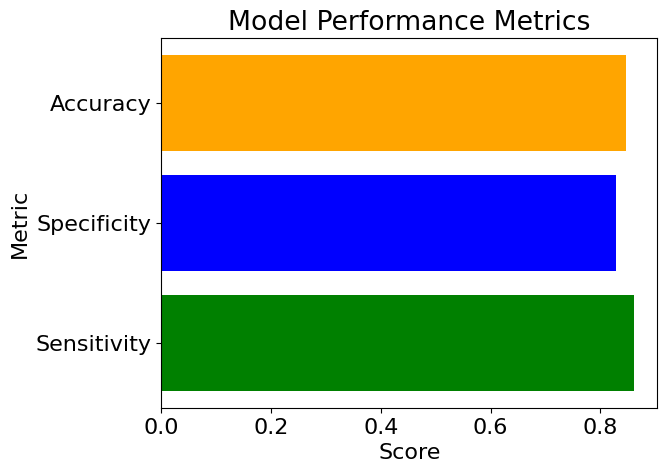

In [62]:
import matplotlib.pyplot as plt

metrics = ['Sensitivity', 'Specificity', 'Accuracy']
values = [sensitivityf, specificityf, Accuracy_stack_model]

plt.barh(metrics, values, color=['green', 'blue', 'orange'])

plt.xlabel('Score')
plt.ylabel('Metric')
plt.title('Model Performance Metrics')

plt.show()


Confusion Matrix of stack

In [63]:
y_test.shape

(1674,)

In [64]:
predictions.shape

(1674,)

In [65]:
# import necessary libraries
from sklearn.metrics import confusion_matrix

# calculate confusion matrix
cm = confusion_matrix(y_test, predictionsp)

# extract true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) from the confusion matrix
TP = cm[1, 1]
TN = cm[0, 0]
FP = cm[0, 1]
FN = cm[1, 0]

# print the results
print("True Positives:", TP)
print("True Negatives:", TN)
print("False Positives:", FP)
print("False Negatives:", FN)

True Positives: 789
True Negatives: 627
False Positives: 130
False Negatives: 128


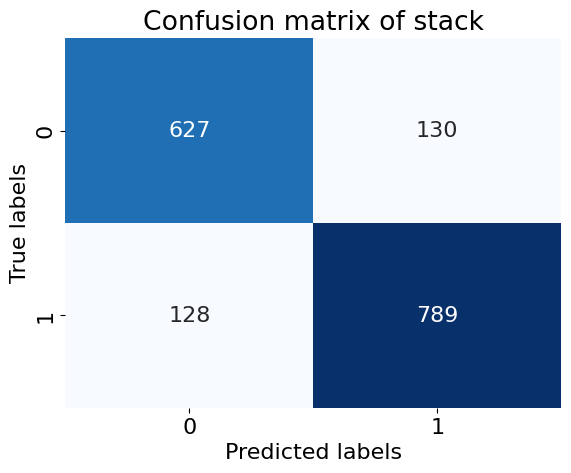

In [66]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Compute confusion matrix
cm = confusion_matrix(y_test, predictionsp)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)

plt.title('Confusion matrix of stack')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


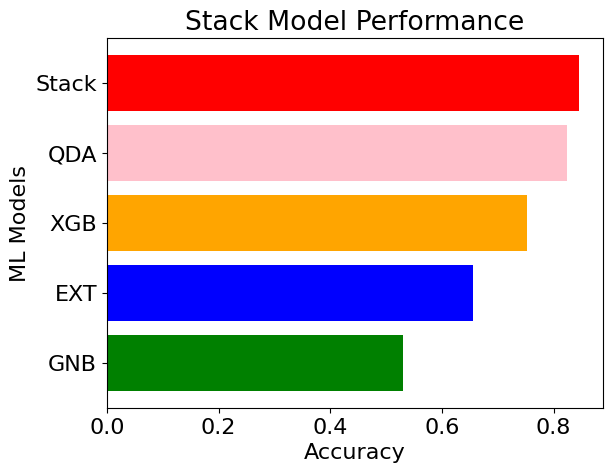

In [67]:
import matplotlib.pyplot as plt

metrics = ['GNB', 'EXT', 'XGB','QDA','Stack']
values = [Accuracy_nbf, Accuracy_extf, Accuracy_xgbf,Accuracy_qdaf, Accuracy_stack_model]

plt.barh(metrics, values, color=['green', 'blue', 'orange','pink','red'])

plt.xlabel('Accuracy')  
plt.ylabel('ML Models')
plt.title('Stack Model Performance')

plt.show()


In [68]:
print('ExecutionTime_nb:', ExecutionTime_nb)
print('ExecutionTime_ext:' , ExecutionTime_ext)
print('ExecutionTime_xgb:' ,ExecutionTime_xgb)
print('ExecutionTime_qda:' ,ExecutionTime_qda)
print('ExecutionTime_stack_modelf:' , ExecutionTime_stack_modelf)

ExecutionTime_nb: 2.70137
ExecutionTime_ext: 0.94157
ExecutionTime_xgb: 3.21566
ExecutionTime_qda: 1.38152
ExecutionTime_stack_modelf: 13.69853


ExecutionTime: contains both training and testing time

[2.70137, 1.38152, 3.21566, 0.94157, 13.69853]


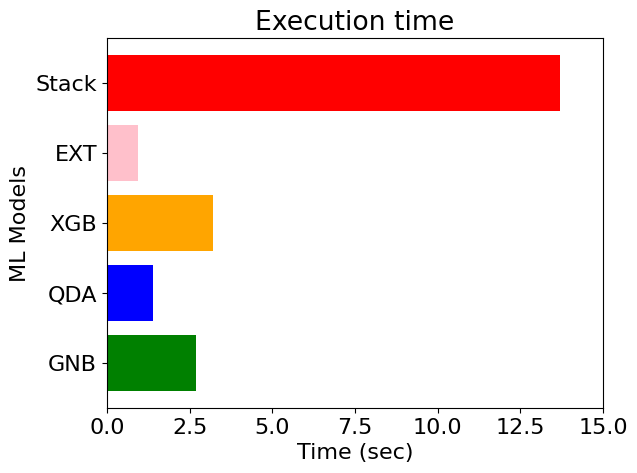

In [69]:
import matplotlib.pyplot as plt

metrics = ['GNB', 'QDA', 'XGB', 'EXT', 'Stack']
values = [float(ExecutionTime_nb), float(ExecutionTime_qda), float(ExecutionTime_xgb), float(ExecutionTime_ext), float(ExecutionTime_stack_modelf)]
print(values)
plt.barh(metrics, values, color=['green', 'blue', 'orange', 'pink', 'red'])

plt.xlim(0, int(max(values) * 1.1))
plt.xlabel('Time (sec)')
plt.ylabel('ML Models')
plt.title('Execution time')

plt.show()


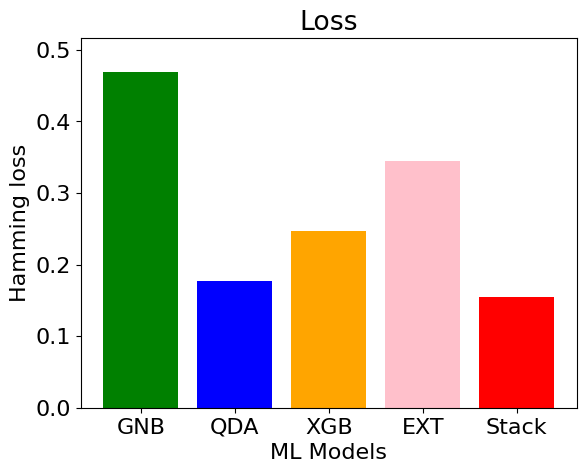

In [73]:
import matplotlib.pyplot as plt

models = ['GNB', 'QDA', 'XGB', 'EXT', 'Stack']
values = [0.46953405017921146, 0.1768219832735962, 0.24731182795698925, 0.34528076463560337, 0.15412186379928317]

# create the vertical bar chart
plt.bar(models, values, color=['green', 'blue', 'orange', 'pink', 'red'])

# set the y-axis limits
plt.ylim(0, max(values) * 1.1)

# add axis labels and a title
plt.xlabel('ML Models')
plt.ylabel('Hamming loss')
plt.title('Loss')

# display the chart
plt.show()
